In [14]:
import warnings
warnings.filterwarnings(action = 'ignore')
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

breast_cancer_data = load_breast_cancer()
df_data = pd.DataFrame(breast_cancer_data.data, columns = breast_cancer_data.feature_names)
df_labels = pd.DataFrame(breast_cancer_data.target, columns = ['label'])   

In [15]:
df_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [16]:
df_data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [17]:
df_data.isnull()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
df_data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [19]:
df = pd.concat([df_data, df_labels], axis = 1)
df[10:20]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
10,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,...,33.88,123.8,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452,0
11,15.78,17.89,103.60,781.0,0.09710,0.12920,0.09954,0.06606,0.1842,0.06082,...,27.28,136.5,1299.0,0.1396,0.5609,0.3965,0.18100,0.3792,0.10480,0
12,19.17,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,0.07800,...,29.94,151.7,1332.0,0.1037,0.3903,0.3639,0.17670,0.3176,0.10230,0
13,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,0.05338,...,27.66,112.0,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287,0
14,13.73,22.61,93.60,578.3,0.11310,0.22930,0.21280,0.08025,0.2069,0.07682,...,32.01,108.8,697.7,0.1651,0.7725,0.6943,0.22080,0.3596,0.14310,0
15,14.54,27.54,96.73,658.8,0.11390,0.15950,0.16390,0.07364,0.2303,0.07077,...,37.13,124.1,943.2,0.1678,0.6577,0.7026,0.17120,0.4218,0.13410,0
16,14.68,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,0.1586,0.05922,...,30.88,123.4,1138.0,0.1464,0.1871,0.2914,0.16090,0.3029,0.08216,0
17,16.13,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,0.07356,...,31.48,136.8,1315.0,0.1789,0.4233,0.4784,0.20730,0.3706,0.11420,0
18,19.81,22.15,130.00,1260.0,0.09831,0.10270,0.14790,0.09498,0.1582,0.05395,...,30.88,186.8,2398.0,0.1512,0.3150,0.5372,0.23880,0.2768,0.07615,0
19,13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,...,19.26,99.7,711.2,0.1440,0.1773,0.2390,0.12880,0.2977,0.07259,1


<AxesSubplot:xlabel='worst area', ylabel='mean radius'>

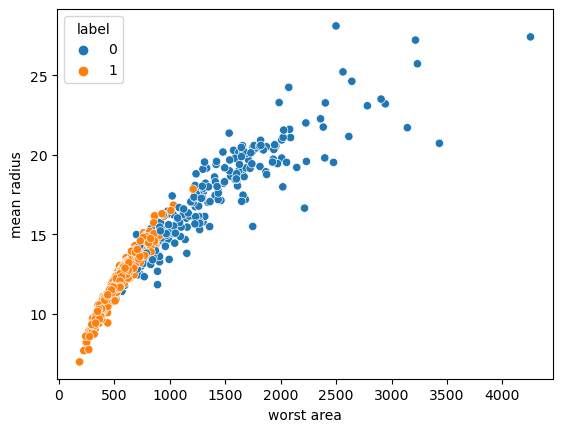

In [20]:
sns.scatterplot(x = 'worst area', y = 'mean radius',hue = 'label', data = df)

<AxesSubplot:xlabel='label', ylabel='count'>

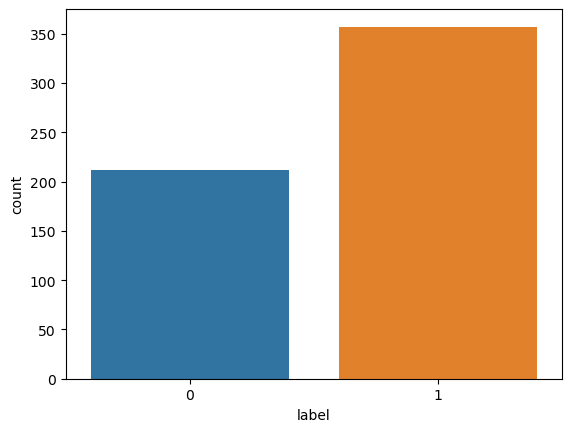

In [21]:
sns.countplot(x='label', data = df)

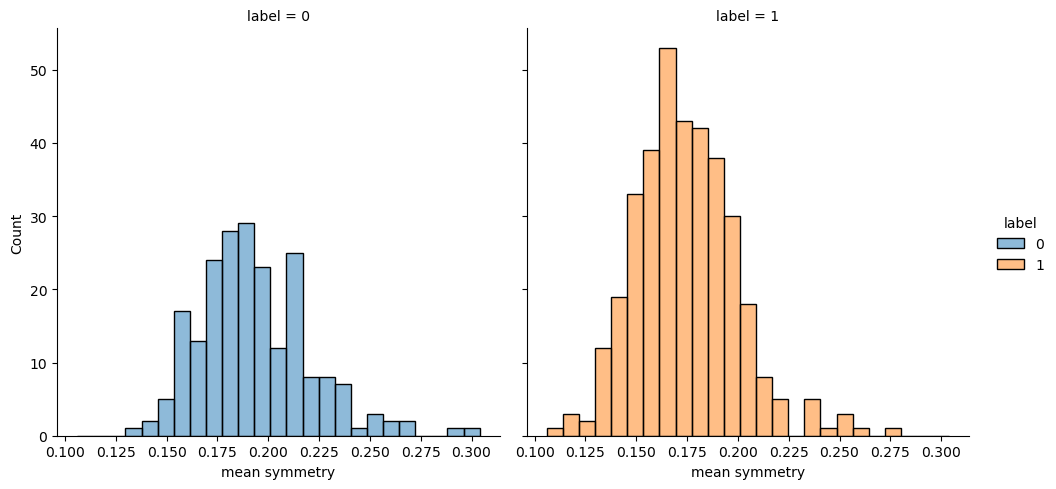

In [34]:
sns.displot(data = df, x = 'mean symmetry', hue='label', col = 'label')

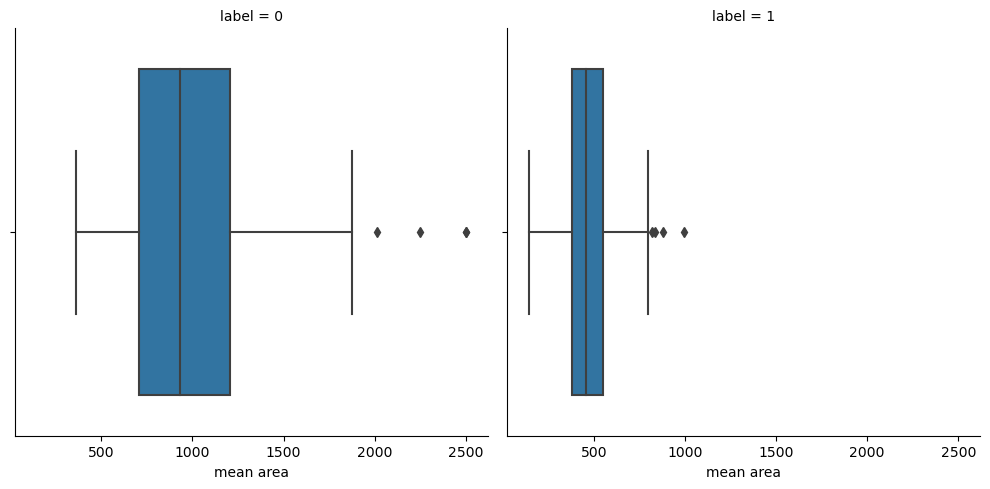

In [33]:
sns.catplot(x='mean area',col = 'label',data = df, kind = 'box')

In [33]:
print(breast_cancer_data.target_names)

['malignant' 'benign']


In [18]:
X_train, X_test, y_train, y_test = train_test_split(df_data, df_labels, test_size=0.2,stratify = df_labels, random_state=1)

print("X_train.shape :", X_train.shape)

print("y_train.shape :", y_train.shape)

print("X_test.shape:", X_test.shape)

print("y_test.shape:", y_test.shape)

X_train.shape : (455, 30)
y_train.shape : (455, 1)
X_test.shape: (114, 30)
y_test.shape: (114, 1)


In [19]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
mymodel = KNeighborsClassifier(n_neighbors=3)
mymodel.fit(X_train, y_train)
prediction = mymodel.predict(X_test)
mymodel.score(X_test, y_test)

0.9736842105263158